### 1. Given two 1-d arrays of simulated values and observed values, Write a Pyhton function to calculate the mean error, coefficient of determination and nash coefficient. Not allowed to use loops.

In [36]:
import numpy as np

def mean_error(obs, sim):
    obs = np.array(obs)
    sim = np.array(sim)
    return np.nanmean(sim - obs)

def coeff_determination(obs, sim):
    obs = np.array(obs)
    sim = np.array(sim)
    n = obs.size
    return (n * np.nansum(obs * sim) - np.nansum(obs) * np.nansum(sim)) ** 2 / \
            ((n * np.nansum(obs ** 2) - np.nansum(obs) ** 2) * (n * np.nansum(sim ** 2) - np.nansum(sim) ** 2))

def coeff_nash(obs, sim):
    obs = np.array(obs)
    sim = np.array(sim)
    obs_mean = np.nanmean(obs)
    return 1 - np.nansum((sim - obs) ** 2) / np.nansum((sim - obs_mean) ** 2)

In [37]:
obs = [1, 40, 31, 40, 57, 88]
sim = [-13, 79, 71, 81, 104, 42]


print(obs)
print(sim)

print('coefficient of determination:', coeff_determination(obs, sim))
print('Nash\'s efficiency:', coeff_nash(obs, sim))

[1, 40, 31, 40, 57, 88]
[-13, 79, 71, 81, 104, 42]
coefficient of determination: 0.1946307482217675
Nash's efficiency: 0.10506359491240702


### 2. Given `x` and `y`, write a Python function to perform linear regression which returns `a`, `c` and `sum of square errors` where `ax + c = y` 
```python
def linear_regression(x, y):
    
    return a, c, ssqe

```

In [48]:
def linear_regression(x, y):
    # get rid of nans
    not_nan = ~ (np.isnan(x) | np.isnan(y))
    x = np.array(x)[not_nan]
    y = np.array(y)[not_nan]
    if x.size != y.size:
        print('the sizes are different between x and y')
        return
    sumx = x.sum()
    sumxx = (x ** 2).sum()
    sumy = y.sum()
    sumxy = (x * y).sum()
    n = x.size
    a = (sumxy - sumx * sumy / n) / (sumxx - sumx ** 2 / n)
    c = y.mean() - a * x.mean()
    ssqe = np.nansum((a * x + c - y) ** 2)
    return a, c, ssqe

x = obs
y = sim
linear_regression(x, y)

(0.631968168481974, 33.59736345002211, 6853.15541979824)

In [47]:
import matplotlib.pyplot as plt

plt.scatter(range())

[1, 40, 31, 40, 57, 88]

### 3. Eestimate the mean precipitation on different land use types.

```python
landuse       = np.random.randint(1, 5, [5, 5])
precipitation = np.random.random([5, 5])

print('landuse\n', landuse)
print('landuse\n', precipitation)
```



In [107]:
# create the datasets
landuse = np.random.randint(1, 5, [5, 5])
precip  = np.random.random([5, 5])

print('landuse\n', landuse)
print('precip \n', precip)

# calculation
def landuse_precip(landuse, precip, prefix='landuse'):
    return [(f'{prefix}{i}', (precip[landuse == i]).mean()) for i in np.unique(landuse)]

landuse_precip(landuse, precip)

landuse
 [[2 4 3 3 2]
 [3 1 1 1 4]
 [3 3 2 3 4]
 [4 4 3 4 1]
 [1 4 2 4 3]]
precip 
 [[0.66732029 0.24066232 0.36044915 0.6125942  0.3711299 ]
 [0.31692713 0.17567398 0.3604778  0.01410569 0.22511356]
 [0.82560462 0.0781952  0.93280373 0.6689976  0.51210169]
 [0.81030755 0.58564598 0.64555393 0.90347877 0.5435653 ]
 [0.25306865 0.74882032 0.09286459 0.67419406 0.57715862]]


[('landuse1', 0.2693782832599876),
 ('landuse2', 0.5160296263889632),
 ('landuse3', 0.5106850552637753),
 ('landuse4', 0.5875405319285558)]

### 4. We have two array. The first array is the distribution of irrigated land. The second array is the precipitation. 

A. Create a function to create the buffer zones of varied distances to the irrigated land.

B. Calculate the mean precipitation in the buffer zones of different distance to the irrigated land.


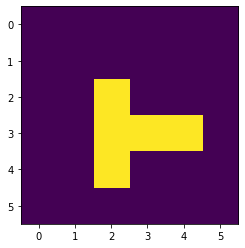

In [110]:
import numpy as np
import matplotlib.pyplot as plt
landuse = [
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0],
]
precip  = np.random.random([6, 6])
plt.imshow(landuse)

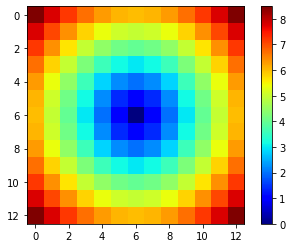

In [99]:
# first define an array with the distance to the center
distance_x = np.arange(13).reshape([1, 13])
distance_y = np.arange(13).reshape([13, 1])
distance = np.sqrt((distance_x - 6) ** 2 + (distance_y - 6) ** 2) #.astype(np.int)
plt.imshow(distance, cmap='jet'); plt.colorbar()

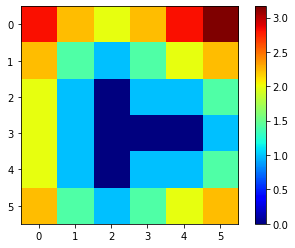

In [102]:
def create_buffer(landuse, distance=distance):
    
    buf = np.full_like(landuse, 1e9)
    n, m = buf.shape
    index = np.nonzero(landuse)
    for i, j in np.array(index).T:
        distance_buf = distance[(6-i):(6-i+n), (6-j):(6-j+m)]
        buf = np.where(distance_buf < buf, distance_buf, buf)
    return buf

buf = create_buffer(landuse)
plt.imshow(buf, cmap='jet'); plt.colorbar()

In [111]:
landuse_precip(buf, precip, prefix='')

[('0.0', 0.5417397464887708),
 ('1.0', 0.6100394231052623),
 ('1.4142135623730951', 0.5175594391242815),
 ('2.0', 0.37299250749737706),
 ('2.23606797749979', 0.5682777948276453),
 ('2.8284271247461903', 0.6372323798571423),
 ('3.1622776601683795', 0.769356598315023)]

### 5. Write a Python function to find the nearest point of a list of given points. You are not allowed to use any type of loops.
e. g. points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]

Hint: using numpy to create a N x N array which contain the distances between each ith an jth point pair; where N is the numer of points.

In [118]:
points = [(3, 4), (1, 2), (7, 8), (9, 4), (6, 5), (8, 7), (4, 7)]
points = np.array(points)

distances = ((points.reshape(7, 1, 2) - points.reshape(1, 7, 2)) ** 2).sum(axis=2)
distances[np.arange(7), np.arange(7)] = 1e9
np.argmin(distances, axis=0)

array([1, 0, 5, 4, 5, 2, 4], dtype=int64)